In [2]:
# Loading libraries
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

In [3]:
img_0 = []
for i in range(6):
    figName = './NoDrug/rep1_FOV' + str(i+1) + '.tif'
    img = imread(str(figName))
    img_0.append(img)


In [14]:
img_3 = []
for i in range(6):
    figName = './Drug3_1000nM/rep1_FOV' + str(i+1) + '.tif'
    img = imread(str(figName))
    img_3.append(img)

In [6]:
img_0[0].shape

(21, 650, 650, 3)

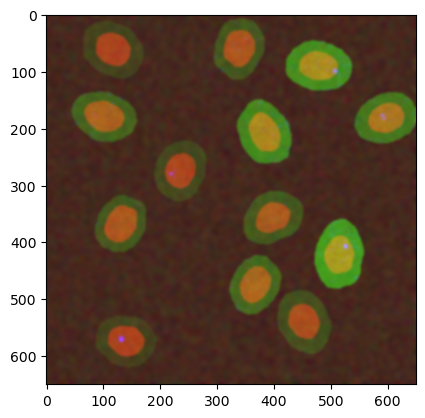

In [9]:
plt.imshow(img_0[0][0])

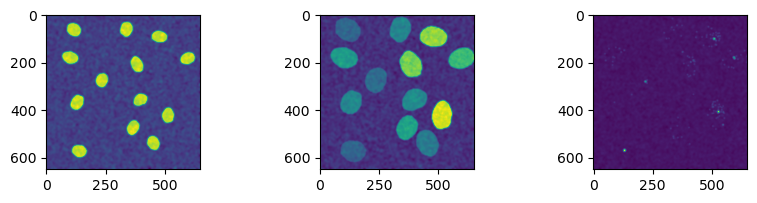

In [10]:
fig, ax = plt.subplots(1,3, figsize=(10,2))
colors = ['red', 'green', 'blue']
for i in range(3):
    ax[i].imshow(img_0[0][0,:,:,i])

In [13]:
fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
i=0
img = img_0[3]
# Define inital frames
Red = img[i,:,:,0]
im1 = axes[0].imshow(Red,cmap='Reds_r')
Green = img[i,:,:,1]
im2 = axes[1].imshow(Green,cmap='Greens_r')
Blue = img[i,:,:,2]
im3 =  axes[2].imshow(Blue,cmap='Blues_r')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

def movieFrame(i):
  Red = img[i,:,:,0]
  Green = img[i,:,:,1]
  Blue = img[i,:,:,2]
  images = [Red,Green,Blue]
  image_handles = [im1,im2,im3]
  for k,image_n in enumerate(images):
    image_handles[k].set_array(images[k])
  return image_handles

plt.close()
anim = animation.FuncAnimation(fig, movieFrame, frames=img.shape[0], interval=20, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [32]:
# FISH visualizer

def FISH_viewer(time=1):
    '''
    This function is intended to display an image from an array of images (specifically, video: img_int8). 
         img_int8 is a numpy array with dimension [T,Y,X,C].
    drop_channel : str with options 'Ch_0', 'Ch_1', 'Ch_2', 'All'
    time: int with range 0 to the number of frames in video.
    '''
    fig, axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
    img = img_0[0]
    Red = img[time,:,:,0]
    im1 = axes[0].imshow(Red,cmap='Reds_r')
    Green = img[time,:,:,1]
    im2 = axes[1].imshow(Green,cmap='Greens_r')
    Blue = img[time,:,:,2]
    im3 =  axes[2].imshow(Blue,cmap='Blues_r')
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.show()

# Defining an interactive plot
# %pip install ipywidgets
from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

interactive_plot = interactive(FISH_viewer, time = widgets.IntSlider(min=0,max=img.shape[0]-1,step=1,value=0,description='time frame'))       
# interactive_plot = interactive(FISH_viewer, img = widgets.Dropdown(options = {'Delta N':img_0[0], 'Delta E': img_0[1]}))
# time slider parameters
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

In [15]:
fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
i=0
img = img_3[3]
# Define inital frames
Red = img[i,:,:,0]
im1 = axes[0].imshow(Red,cmap='Reds_r')
Green = img[i,:,:,1]
im2 = axes[1].imshow(Green,cmap='Greens_r')
Blue = img[i,:,:,2]
im3 =  axes[2].imshow(Blue,cmap='Blues_r')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

def movieFrame(i):
  Red = img[i,:,:,0]
  Green = img[i,:,:,1]
  Blue = img[i,:,:,2]
  images = [Red,Green,Blue]
  image_handles = [im1,im2,im3]
  for k,image_n in enumerate(images):
    image_handles[k].set_array(images[k])
  return image_handles

plt.close()
anim = animation.FuncAnimation(fig, movieFrame, frames=img.shape[0], interval=20, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
# Thresholding the mRNA image
def viewer(threshold=50):
    test_image = np.max(img_0[0][:,:,:,2], axis=0)
    mask_image = np.zeros(test_image.shape)
    mask_image[test_image>threshold] = 255
    f,ax = plt.subplots()
    ax.imshow(mask_image, cmap='Greys')
    plt.show()

interactive_plot = interactive(viewer,threshold = widgets.IntSlider(min=0,max=200,step=1,value=20,description='threshold'))       
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))   

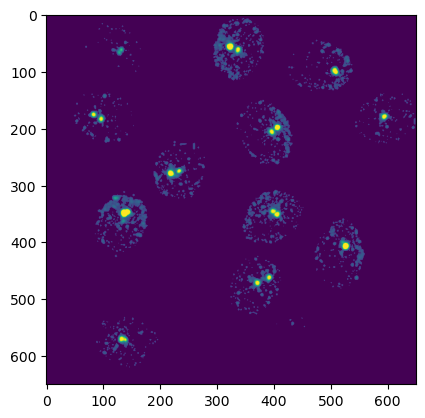

In [ ]:
img_site = np.max(img_0[0][:,:,:,2], axis=0)
img_site_pos = img_site[img_site >= np.mean(img_site)]
img_site = img_site*(img_site >= np.mean(img_site_pos))
plt.imshow(img_site)

In [ ]:
# load the videos from the dataset as 3 channels, with each channel having 21 frames. These frames represent time.
# For the red channel, we want to set a threshold to remove noise in the image red: set a thrshold to remove noise to create the mask (binary) -> number of viable cells
# nucleus size (area of 1s/2s/.../ns)

# green: cell size (mask, binary)
# average of intensity of each cell -> protein concentration of each cell (multiply mask of red)

# blue: (Mask)1.transcription sites (set intensity threshold to capture brightest), 2.mRNA (the dimmer dots)
# transcription sites found by subset of time frame (linspace) or maximum throughout all time
# blue: number of mRNA in nucleus (red True/1 multiply blue mask2(binary with threshold))
# number of mRNA in cytoplasm (green subtract red True/1 multiply blue mask1/ total - number in nucleus)


## compute mask

In [37]:
from cellpose import plot, models
from skimage.morphology import remove_small_objects

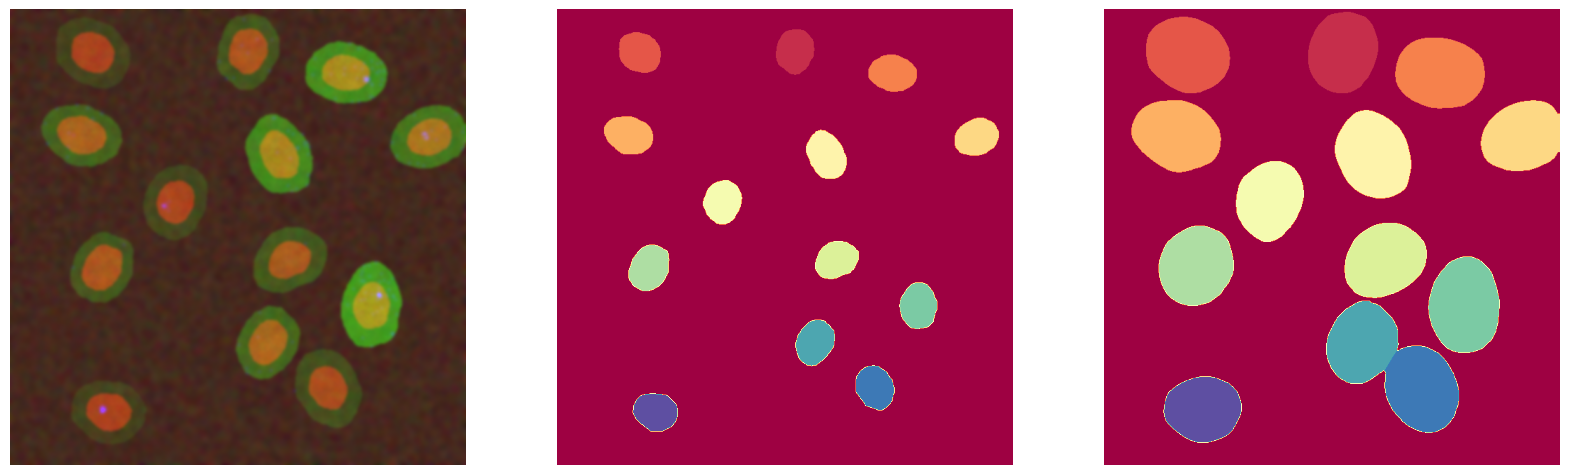

Number of nuclei: 13
Number of cytoplast: 13


In [62]:
# 
img = img_0[0]
img_nuc = img[0,:,:,0:1]
model = models.Cellpose(model_type='nuclei') # model_type='cyto' or model_type='nuclei'
masks_nuc  = model.eval(img_nuc, diameter=100, channels=[0,1])[0]
masks_nuc = remove_small_objects(masks_nuc, min_size=50)


img_cyto = img[0,:,:,0:3]
model = models.Cellpose(model_type='cyto') # model_type='cyto', 'cyto2' or model_type='nuclei'
masks_cyto, flows, styles, diams = model.eval(img_cyto, diameter=200, channels=[0,2])

# Plotting each one of the 3 colors independently
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].imshow(img_0[0][0,:,:,:], cmap='Greys_r')
im = ax[1].imshow(masks_nuc,cmap='Spectral')
# fig.colorbar(im, orientation='vertical')
im2 = ax[2].imshow(masks_cyto,cmap='Spectral')
# fig.colorbar(im2, orientation='vertical')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

print(f'Number of nuclei: {len(np.unique(masks_nuc))-1}')
print(f'Number of cytoplast: {len(np.unique(masks_cyto))-1}')

In [63]:
nucleus_indices = np.zeros(np.max(masks_cyto)+1)
for i in range(1,np.max(masks_nuc)+1):
    posn_nucl = np.mean(np.where(masks_nuc==i),axis=1).astype(int)
    nucleus_indices[masks_cyto[posn_nucl[0],posn_nucl[1]]] = i

print(nucleus_indices)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


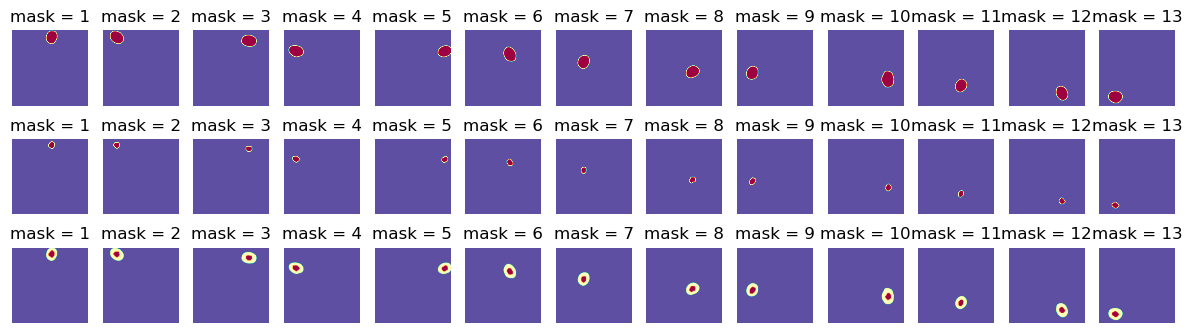

In [57]:
# Show the cytoplasms and corresponding nuclei
number_detected_cells = np.max(masks_cyto)

fig, ax = plt.subplots(3,number_detected_cells, figsize=(15, 4))
for i in range (1,number_detected_cells+1):
  selected_cyto_mask = masks_cyto==i
  ax[0,i-1].imshow(selected_cyto_mask,cmap='Spectral_r')
  ax[0,i-1].set(title='mask = ' + str(i) )
  ax[0,i-1].axis('off')

  # find which nucleus is associated with the cytosol
  selected_nuc_mask = masks_nuc==nucleus_indices[i]
  ax[1,i-1].imshow(selected_nuc_mask,cmap='Spectral_r')
  ax[1,i-1].set(title='mask = ' + str(i) )
  ax[1,i-1].axis('off')

  # find which nucleus is associated with the cytosol
  combined = selected_nuc_mask.astype(int) + selected_cyto_mask.astype(int)
  ax[2,i-1].imshow(combined,cmap='Spectral_r')
  ax[2,i-1].set(title='mask = ' + str(i) )
  ax[2,i-1].axis('off')
plt.show()

In [64]:
# Make a list of their areas.
list_cyt_areas = []
list_nuc_areas = []
for i in range (1,number_detected_cells+1):
  selected_cyto_mask = masks_cyto==i
  area_cyto = np.sum(selected_cyto_mask)
  list_cyt_areas.append(area_cyto)
  selected_nuc_mask = masks_nuc==nucleus_indices[i]
  area_nuc = np.sum(selected_nuc_mask)
  list_nuc_areas.append(area_nuc)
print(list_cyt_areas, list_nuc_areas)

[9160, 10145, 10366, 10000, 9198, 10453, 8461, 9627, 9532, 10947, 9114, 10140, 8064] [2748, 2769, 2830, 2971, 2655, 2959, 2636, 2568, 2941, 2756, 2730, 2665, 2698]


In [68]:
img_cyto.shape

(650, 650, 3)

In [67]:
# Let' compute the mean intensity for each cell in the image.
list_mean_intensities = []
for iMask in range (1,number_detected_cells+1):
  selected_mask = masks_cyto==iMask
  mean_intensity = []
  for iColor in range(3):
    selected_color_image = selected_mask*img_cyto[:,:,iColor]
    mean_intensity.append(selected_color_image[np.nonzero(selected_color_image)].mean()) # this step is to avoid the 0 values!!!
  list_mean_intensities.append(mean_intensity)

# Convert the list to a pandas dataframe and display
import pandas as pd
df = pd.DataFrame(list_mean_intensities, columns=['Ch0', 'Ch1', 'Ch2'])
df

,Ch0,Ch1,Ch2
0,100.432751,77.051638,31.121288
1,97.336915,62.444653,30.129522
2,96.154640,118.458132,33.938646
3,99.300800,85.691200,31.108500
4,98.367580,104.822027,32.706458
5,97.195159,113.910552,32.367167
6,100.186503,67.958279,31.469566
7,95.552093,78.827361,30.577646
8,100.396559,74.761645,30.376626
9,94.307756,126.442770,34.340915


C:\Users\yy5019\AppData\Local\Temp\ipykernel_23800\3552008225.py:24: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(survival, np.log10(np.arange(len(survival))))


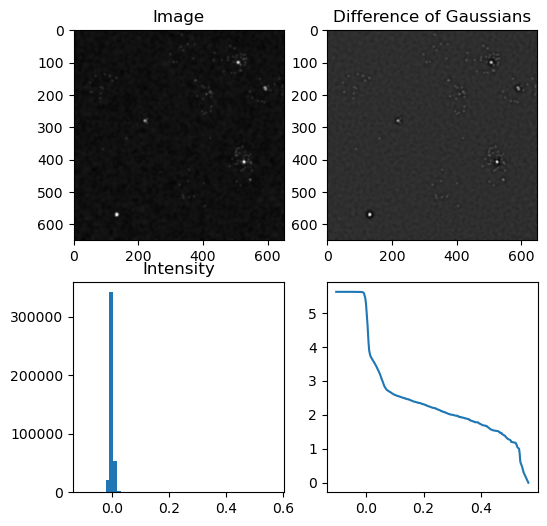

intensity range:  -0.10291584431207496 0.5708251948423355


In [66]:
from skimage.filters import difference_of_gaussians
# Selecting the color channel with RNA spots
zSlice = 0
iChannel = 2
img_spots = img[zSlice,:,:,iChannel]

# Show the original image
fig, ax = plt.subplots(2,2, figsize=(6, 6))
ax[0,0].imshow(img_spots,cmap='Greys_r')
ax[0,0].set(title='Image')

# Apply a difference of Gaussians filter to the image to enhance spots
img_spots_filtered = difference_of_gaussians(img_spots,low_sigma=1, high_sigma=5)
ax[0,1].imshow(img_spots_filtered,cmap='Greys_r')
ax[0,1].set(title= 'Difference of Gaussians' )

# Make a histogram of the intensity values
ax[1,0].hist(img_spots_filtered.flatten(),bins=50)
ax[1,0].set(title= 'Intensity' )

# Make a survival plot of the intensity values
survival = np.sort(img_spots_filtered.flatten())
survival = survival[::-1]
ax[1,1].plot(survival, np.log10(np.arange(len(survival))))

plt.show()
print('intensity range: ', np.min(img_spots_filtered), np.max(img_spots_filtered))

In [ ]:
def find_nuc_cyto(img):
    tt = img.shape[0]
    t = 0
    img_nuc = img[t,:,:,0]
    model = models.Cellpose(model_type='nuclei') # model_type='cyto' or model_type='nuclei'
    masks_nuc  = model.eval(img_nuc, diameter=200, channels=[0,1])[0]
    masks_nuc = remove_small_objects(masks_nuc, min_size=50)

    img_cyto = img[t,:,:,1]
    model = models.Cellpose(model_type='cyto') # model_type='cyto', 'cyto2' or model_type='nuclei'
    masks_cyto, flows, styles, diams = model.eval(img_cyto, diameter=200, channels=[0,2])

    nucleus_indices = np.zeros(np.max(masks_cyto)+1)
    for i in range(1,np.max(masks_nuc)+1):
        posn_nucl = np.mean(np.where(masks_nuc==i),axis=1).astype(int)
        nucleus_indices[masks_cyto[posn_nucl[0],posn_nucl[1]]] = i

    number_detected_cells = np.max(masks_cyto)
    
    # Make a list of their areas.
    list_cyt_areas = []
    list_nuc_areas = []
    for i in range (1, number_detected_cells+1):
        selected_cyto_mask = (masks_cyto==i)
        area_cyto = np.sum(selected_cyto_mask)
        list_cyt_areas.append(area_cyto)
        selected_nuc_mask = (masks_nuc==nucleus_indices[i])
        area_nuc = np.sum(selected_nuc_mask)
        list_nuc_areas.append(area_nuc)
    
    # Let' compute the mean intensity for each cell in the image.
    list_mean_intensities = []
    for iMask in range (1, number_detected_cells+1):
        selected_mask = (masks_cyto==iMask)
        mean_intensity = []
        for iColor in range(3):
            selected_color_image = selected_mask*img_cyto[:,:,iColor]
            mean_intensity.append(selected_color_image[np.nonzero(selected_color_image)].mean()) # this step is to avoid the 0 values!!!
    list_mean_intensities.append(mean_intensity)

    # Convert the list to a pandas dataframe and display
    import pandas as pd
    df = pd.DataFrame(list_mean_intensities, columns=['Ch0', 'Ch1', 'Ch2'])
    
    